`Pandas` veri analitiği alanında, özellikle veri işleme ve analizi için sıklıkla kullanılan bir Python paketi. `Pandas` paketi seri (`Series`) ve veri çerçevesi (`DataFrame`) isimli iki veri yapısının üzerine kurulmuş. Bunlardan serileri tek boyutlu diziler, veri çerçevelerini ise iki boyutlu matrisler (ya da her kolonu bir seriden oluşan yapı) gibi düşünebiliriz. Ancak `Pandas` paketi liste ve matrislerden farklı işlevler sunuyor. Örnek olarak SQL tablolarında kullanılan tablo birleştirme (join) gibi işlemleri de `Pandas` sayesinde yapmak mümkün.

`Pandas` paketiyle yapabileceğimiz temel işlemleri aşağıda bulabilirsiniz:
* Veriyi çeşitli formatlardaki dosyalardan okutmak ve dosyalara yazdırmak mümkün. `Pandas`, metin ve Excel dosyalarının yanında, Stata ve SAS gibi yazılımların formatlarını da destekliyor. 
* Eksik değerleri doldurmak/çıkarmak için yöntemler içeriyor.
* Çeşitli veri çerçevelerini birleştirmek (SQL dilindeki JOIN ve MERGE işlemleri) mümkün.
* Farklı türlerde grafikler çizdirebiliriz. 
* Groupby fonksiyonu sayesinde veriyi gruplara bölerek, yapacağımız işlemlerle (toplama, sayma, ortalama alma gibi) özetleyebiliriz. `Groupby` konusunda yazdığımız detaylı bir yazıya [linkten](http://www.veridefteri.com/2017/10/30/groupby/) erişebilirsiniz. 

`Pandas` ile ilgili yazı serisinin ilk bölümünde seri veri yapısını inceleyeceğiz. Burada kullandığımız yöntemlerin çoğu veri çerçeveleri için de geçerli olacaktır. Pandas serilerine giriş amacıyla IMF'nin gayrisafi yurt içi hasıla verisini kullanacağız. Detaylı veri setine [linkten](http://www.imf.org/external/pubs/ft/weo/2017/02/weodata/download.aspx) erişebilirsiniz. Ben küçük bir örneklemle çalıştığım için veriyi okutmayla ilgili kısımlara, veri çerçeveleriyle ilgili yazıda değineceğim.

# Seriler

Seri, etiketli verilerden oluşan tek boyutlu bir veri yapısıdır. Etiket değerlerine indeks denir. Verinin kendisi sayılar, dizeler ya da başka Python objelerinden oluşabilir. Serileri oluşturmak için listeler, sıralı diziler ya da sözlükler kullanılabilir. 10 ülkenin 2017 yılının GSYİH değerlerinden oluşan bir seri oluşturalım. Dikkat etmemiz gereken nokta indeks ve verinin aynı boyutta olması. Bunu sağlayamazsak hata mesajı alacağız.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Pandas paketini yükleyelim
import pandas as pd 
import numpy as np

#GSYİH değeri en yüksek olan 10 ülkenin değerlerini kullanacağız.
gdp_data_2017 = [19362.13, 11937.56, 4884.49, 3651.87, 2574.81, 2565.05, 2439.01, 2080.92, 1921.14, 1640.39]

#Seriyi oluşturalım. İndeks değerini vermediğimizde, Pandas 0'dan başlayarak veriyi indeksler.
gdp_2017 = pd.Series(gdp_data_2017)
print(gdp_2017)

0    19362.13
1    11937.56
2     4884.49
3     3651.87
4     2574.81
5     2565.05
6     2439.01
7     2080.92
8     1921.14
9     1640.39
dtype: float64


İndeks değeri vermediğimizde seri pek anlamlı durmuyor. İndeks değerlerini bir liste olarak sonradan atayabilir ya da seriyi oluştururken belirtebiliriz.

In [2]:
# İndeks değerlerini içeren listeyi oluşturalım.
gdp_index_2017 = ['ABD', 'Çin', 'Japonya', 'Almanya', 'Fransa', 'Birleşik Krallık', 'Hindistan', 'Brezilya', 'İtalya', 'Kanada']

# Serinin indeks değerini oluşturduğumuz listeye eşitleyelim.
gdp_2017.index = gdp_index_2017
print(gdp_2017)

# Seriyi oluştururken indeks değerlerini belirtmek için aşağıdaki satırı kullanabiliriz.
#gdp_2017 = pd.Series(gdp_data_2017, index = gdp_index_2017)

ABD                 19362.13
Çin                 11937.56
Japonya              4884.49
Almanya              3651.87
Fransa               2574.81
Birleşik Krallık     2565.05
Hindistan            2439.01
Brezilya             2080.92
İtalya               1921.14
Kanada               1640.39
dtype: float64


2016 yılı için de aşağıdaki gibi sözlük veri yapısını kullanarak bir seri oluşturalım. Bu sefer seriyi oluşturmak için bir sözlük kullanacağız. 

In [3]:
d = {'ABD':18624.45,
'Çin':11232.11,
'Japonya':4936.54,
'Almanya':3479.23,
'Fransa':2466.47,
'Birleşik Krallık':2629.19,
'Hindistan':2263.79,
'Brezilya':1798.62,
'İtalya':1850.74,
'Kanada':1529.76}

gdp_2016 = pd.Series(d)

print(gdp_2016)

ABD                 18624.45
Almanya              3479.23
Birleşik Krallık     2629.19
Brezilya             1798.62
Fransa               2466.47
Hindistan            2263.79
Japonya              4936.54
Kanada               1529.76
Çin                 11232.11
İtalya               1850.74
dtype: float64


Sözlük yapısıyla girdiğimiz verilerin sırasının değiştiğini, alfabetik olarak sıralandığını görüyoruz. `Pandas` indeksin değerine göre işlem yaptığı için bunun bir önemi yok. 

Veri kümesini genişletmek istediğimizde iki seçeneğimiz var:
* Köşeli parantez ile veriyi girebiliriz.
* Oluşturduğumuz ikinci bir seriyi `append` fonksiyonuyla ilk seriye ekleyebiliriz. 

Köşeli parantezle girdiğimiz veri o indekse sahip bütün girdileri sağladığımız değere eşitler. Eğer o indekse sahip bir değer yoksa seriye yeni bir eleman ekler.

In [4]:
# Kore'nin GSYİH değerini giriyoruz. 
# Seride 'Korea' indeksine sahip bir eleman olmadığı için seriye yeni bir eleman eklenecek.
gdp_2016['Kore'] = 1411.04

print(gdp_2016)

#Aşağıdaki satırı eklemiş olsaydık yeni bir gözlem eklemek yerine var olan gözlemi değiştirmiş olacaktık.
#gdp['China'] = 1411.04 

ABD                 18624.45
Almanya              3479.23
Birleşik Krallık     2629.19
Brezilya             1798.62
Fransa               2466.47
Hindistan            2263.79
Japonya              4936.54
Kanada               1529.76
Çin                 11232.11
İtalya               1850.74
Kore                 1411.04
dtype: float64


`append` fonksiyonunu kullandığımızda ise bir seri, diğerinin sonuna eklenir. Burada dikkat etmemiz gereken nokta aynı indekse sahip elemanlar varsa bunların çoğullanacak olmasıdır. Sözlüğün içinde aynı indekse sahip girdiler varsa en sonuncusu alınır. Aşağıdaki örnekte Meksika'nın tek girdisi olmasına rağmen ABD'nin iki girdisi olduğunu görüyoruz.

In [5]:
d1 = {'Rusya' : 1365.865,
'Avustralya' : 1229.938,
'İspanya' : 1193.556,
'Meksika' : np.NaN,
'Meksika' : 1,
'Meksika' : 1046.925,
'ABD' : 0
}

gdp_2016 = gdp_2016.append(pd.Series(d1))
print(gdp_2016)

ABD                 18624.450
Almanya              3479.230
Birleşik Krallık     2629.190
Brezilya             1798.620
Fransa               2466.470
Hindistan            2263.790
Japonya              4936.540
Kanada               1529.760
Çin                 11232.110
İtalya               1850.740
Kore                 1411.040
ABD                     0.000
Avustralya           1229.938
Meksika              1046.925
Rusya                1365.865
İspanya              1193.556
dtype: float64


# Temel Metotlar ve Erişim

Seriler veri ve indeks değerlerinden oluşur. `values` ve `index` metotlarıyla bunlara erişmek mümkündür. 

Yazının geri kalanında, kimi çıktılarda kullanılan biçimlendirmeyi (`format`)  öğrenmek için Kaan'ın [dize biçimlendirme](http://www.veridefteri.com/2018/02/23/python-programlamaya-giris-16-dize-bicimlendirme/) yazısını inceleyebilirsiniz. 

In [6]:
print('GSYİH değerleri: {}'.format(gdp_2017.values))
print('İndeks değerleri: {}'.format(gdp_2017.index))

GSYİH değerleri: [ 19362.13  11937.56   4884.49   3651.87   2574.81   2565.05   2439.01
   2080.92   1921.14   1640.39]
İndeks değerleri: Index(['ABD', 'Çin', 'Japonya', 'Almanya', 'Fransa', 'Birleşik Krallık',
       'Hindistan', 'Brezilya', 'İtalya', 'Kanada'],
      dtype='object')


`ndim` boyutu, `shape` şekli, `size` ise serinin uzunluğunu verir.

In [7]:
print('Boyut: {}'.format(gdp_2017.ndim))
print('Şekil: {}'.format(gdp_2017.shape))
print('Uzunluk: {}'.format(gdp_2017.size))

Boyut: 1
Şekil: (10,)
Uzunluk: 10


Serideki değerlerin ve indeksin adını da belirtmek mümkün. Bunun için `name` metodunu kullanabiliriz. İndeksin ülkeler, verinin de GSYİH olduğunu belirtelim.

In [8]:
gdp_2017.name = 'GSYİH'
gdp_2017.index.name = 'Ülkeler'
print(gdp_2017)

Ülkeler
ABD                 19362.13
Çin                 11937.56
Japonya              4884.49
Almanya              3651.87
Fransa               2574.81
Birleşik Krallık     2565.05
Hindistan            2439.01
Brezilya             2080.92
İtalya               1921.14
Kanada               1640.39
Name: GSYİH, dtype: float64


Veriyle ilgili özet bilgiler almak ve serinin içeriğine bakmak için `describe` ve `head` fonksiyonlarını kullanabiliriz. `head` fonksiyonuna sağlayacağınız bir tamsayı, kaç satırlık veriye ulaşacağınızı belirleyecektir (varsayılan değer 5).

In [9]:
print('Verinin özeti:')
print(gdp_2017.describe())
print('Serinin ilk beş satırı:')
print(gdp_2017.head())

Verinin özeti:
count       10.000000
mean      5305.737000
std       5801.849771
min       1640.390000
25%       2170.442500
50%       2569.930000
75%       4576.335000
max      19362.130000
Name: GSYİH, dtype: float64
Serinin ilk beş satırı:
Ülkeler
ABD        19362.13
Çin        11937.56
Japonya     4884.49
Almanya     3651.87
Fransa      2574.81
Name: GSYİH, dtype: float64


Erişim için indeksin değerini ya da sırasını verebiliriz. Örnek olarak Çin'in ve 5. sıradaki (indeksi 4 olan) ülkenin GSYİH değerlerine bakalım. Sıra numarasıyla eriştiğimizde indeks değerini ayrıca kontrol etmemiz gerekebilir. Seriyi sözlük kullanarak oluşturduğumuzda girdilerin sırasının değiştiğini hatırlayalım.

In [10]:
print('gdp_2017[\'Çin\']: {}'.format(gdp_2017['Çin']))
print('gdp_2017[4]: {}'.format(gdp_2017[4]))

gdp_2017['Çin']: 11937.56
gdp_2017[4]: 2574.81


[Sıralı nesnelerdeki dilimleme](http://www.veridefteri.com/2018/01/26/python-programlamaya-giris-sirali-nesnelerle-islemler/) işlemleri `Pandas` serilerinde de kullanılabilir. Dilimleme için iki seçenek var: indeksin sırası ve kendisi. `iloc` indeksin sırasıyla, `loc` indeksin kendisiyle işlem yapmaya olanak verir. `loc` metotunda ilk eleman da son eleman da dilimlemeye dahil edilir. İlk 3 elemana (`iloc`) ve Japonya ile İtalya arasındaki elemanlara (`loc`) erişelim.

In [11]:
print('gdp_2017.iloc[:3]:\n{}'.format(gdp_2017.iloc[:3]))
print('gdp_2017.loc[\'Japonya\':\'İtalya\']:\n{}'.format(gdp_2017.loc['Japonya':'İtalya']))

gdp_2017.iloc[:3]:
Ülkeler
ABD        19362.13
Çin        11937.56
Japonya     4884.49
Name: GSYİH, dtype: float64
gdp_2017.loc['Japonya':'İtalya']:
Ülkeler
Japonya             4884.49
Almanya             3651.87
Fransa              2574.81
Birleşik Krallık    2565.05
Hindistan           2439.01
Brezilya            2080.92
İtalya              1921.14
Name: GSYİH, dtype: float64


`gdp_2016` tablosunda indeksi ABD olan iki girdi var. Şimdi bunlardan birini silelim. ABD'nin GSYİH değerini 18624.450'ye eşitleyerek değerleri `drop_duplicate` fonksiyonuyla tekilleştirelim. 

In [12]:
# Aşağıdaki satır indeksi ABD olan bütün girdileri değiştirir.
gdp_2016['ABD'] = 18624.450
print('Tekilleştirme öncesi')
print(gdp_2016)
# Aşağıdaki satır aynı olan değerleri tekilleştirir. 
# inplace = True sayesinde işlemi serinin kendisi üzerinde yapıyoruz.
gdp_2016.drop_duplicates(inplace = True)
print('Tekilleştirme sonrası')
print(gdp_2016)

Tekilleştirme öncesi
ABD                 18624.450
Almanya              3479.230
Birleşik Krallık     2629.190
Brezilya             1798.620
Fransa               2466.470
Hindistan            2263.790
Japonya              4936.540
Kanada               1529.760
Çin                 11232.110
İtalya               1850.740
Kore                 1411.040
ABD                 18624.450
Avustralya           1229.938
Meksika              1046.925
Rusya                1365.865
İspanya              1193.556
dtype: float64
Tekilleştirme sonrası
ABD                 18624.450
Almanya              3479.230
Birleşik Krallık     2629.190
Brezilya             1798.620
Fransa               2466.470
Hindistan            2263.790
Japonya              4936.540
Kanada               1529.760
Çin                 11232.110
İtalya               1850.740
Kore                 1411.040
Avustralya           1229.938
Meksika              1046.925
Rusya                1365.865
İspanya              1193.556
dtype: float

Tek bir ülkeyi silmek için `drop` fonksiyonuna indeks değerini vermemiz yeterli.

In [13]:
gdp_2016.drop('Kanada', inplace = True)
print(gdp_2016)

ABD                 18624.450
Almanya              3479.230
Birleşik Krallık     2629.190
Brezilya             1798.620
Fransa               2466.470
Hindistan            2263.790
Japonya              4936.540
Çin                 11232.110
İtalya               1850.740
Kore                 1411.040
Avustralya           1229.938
Meksika              1046.925
Rusya                1365.865
İspanya              1193.556
dtype: float64


`drop` fonksiyonuyla birden fazla değer de silebiliriz. Örnek olarak Kore ile İspanya arasındaki bütün değerleri silelim. `drop` fonksiyonu indeks değerleriyle işlem yaptığı için, Kore ile İspanya arasındaki indeks değerlerini kullanacak.

In [14]:
gdp_2016.drop(gdp_2016.loc['Kore' : 'İspanya'].index, inplace = True)
print(gdp_2016)

ABD                 18624.45
Almanya              3479.23
Birleşik Krallık     2629.19
Brezilya             1798.62
Fransa               2466.47
Hindistan            2263.79
Japonya              4936.54
Çin                 11232.11
İtalya               1850.74
dtype: float64


# Grafikler

`Pandas`, `matplotlib` paketini kullanarak grafik çizdirmeye de izin veriyor. Bu amaçla `plot` fonksiyonunu kullanabiliriz. Grafiğin tarzını belirtmek için de `kind` argümanını kullanabiliriz. Kind argümanı histogram (`hist`), pasta grafiği (`pie`) ya da çizgi grafiği (`line`) gibi temel grafik çeşitlerini destekliyor. İstanbul'un yıl içindeki sıcaklığını (`line`) ve 2017 yılı için GSYİH dağılımını (`pie`) görselleştirelim.

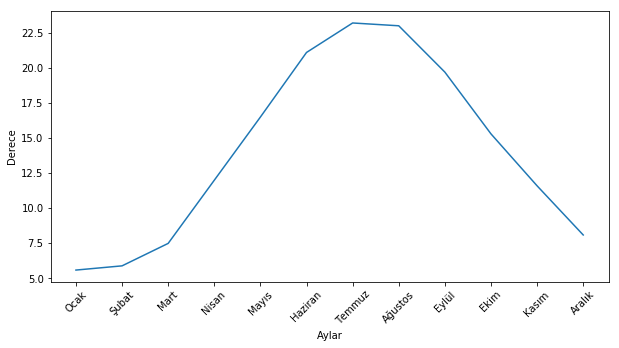

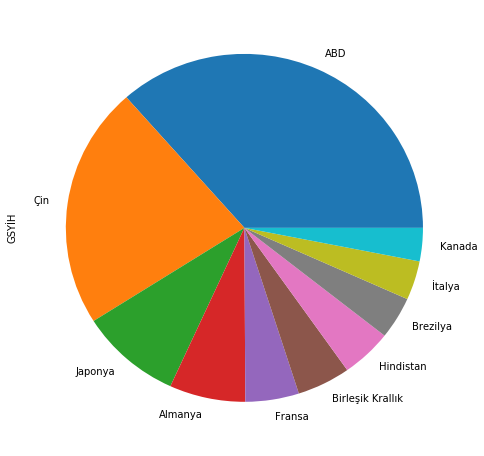

In [15]:
"""
# Sıcaklık verisini aşağıdaki kodu kullanarak elde ettim. Daha sonra ay isimlerini Türkçeye çevirdim
# Pandas altındaki okuma ve yazma fonksiyonlarına ileriki yazılarda değineceğiz.

temp = pd.read_html('http://www.yr.no/place/Turkey/Istanbul/Istanbul/statistics.html', header = 1, index_col=0) 
temp_ist = pd.Series(temp[1]['Normal'], index= temp[1].index.values)
temp_ist = temp_ist.astype(str).str[:-2].astype(np.float)
"""

temp_ist = pd.Series([5.6, 5.9, 7.5, 12., 16.5, 21.1, 23.2, 23., 19.7, 15.3, 11.6, 8.1], 
                     index = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs','Haziran', 
                              'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'])
temp_ist.name = 'Sıcaklık'
temp_ist.index.name = 'Aylar'
plt.figure(figsize= (10,5))
# Çizgi grafiği çizdirelim.
temp_ist.plot(kind = 'line', xticks=np.arange(0,12), rot = 45)
plt.ylabel('Derece')
plt.show()

gdp_2017.name = 'GSYİH'
plt.figure(figsize= (8,8))
# Pasta grafiği çizdirelim.
gdp_2017.plot(kind = 'pie')
plt.show()

# İşlemler

Seriler üzerinde dört işlem yapmak mümkündür. Yaptığımız işlemlerde sadece aynı indekse sahip elemanlar bu işlemlerden etkilenir. İşlem yaparken eksik olan gözlemler ya da bir seride bulunmayan gözlemler diğer serilerde olsa bile `NaN` değerini alır. Bunu engellemek ve eksik olan değerleri doldurmak istiyorsanız işlemlerle ilgili fonksiyonları (`add`, `subtract`, `divide`, `multiply`) kullanabilirsiniz. `fill_value` parametresiyle eksik değerleri değiştirmek mümkün. Ancak iki seride de bulunmayan değerler yine `NaN` değerini alacaktır.

In [16]:
d1 = {'a' : 1, 'b' : 2,'c' : 6, 'f' : np.NaN}
d2 = {'a' : 4, 'b' : 3.2, 'd' : 7, 'f' : np.NaN}

s1 = pd.Series(d1)
s2 = pd.Series(d2)
print(s1 + s2)
print(s1 * s2)
print(s1.multiply(s2, fill_value=1))

a    5.0
b    5.2
c    NaN
d    NaN
f    NaN
dtype: float64
a    4.0
b    6.4
c    NaN
d    NaN
f    NaN
dtype: float64
a    4.0
b    6.4
c    6.0
d    7.0
f    NaN
dtype: float64


Aynı indekse sahip birden fazla değer varsa yapılan işlemler o indekse ait bütün değerler üzerinden yapılır. Aşağıdaki örnekte iki seride de `a` indeksine sahip iki değer var (Birinci seride 1 ve 5, ikinci seride 4 ve 5). Serileri topladığımızda `a` indeksine ait dört değer görüyoruz. 

In [17]:
d1 = {'a' : 1, 'b' : 2,'c' : 6}
d2 = {'a' : 4, 'b' : 3.2, 'd' : 7}

d3 = {'a' : 5}
s1 = pd.Series(d1)
s2 = pd.Series(d2)
s1 = s1.append(pd.Series(d3))
s2 = s2.append(pd.Series(d3))

print(s1 + s2)

a     5.0
a     6.0
a     9.0
a    10.0
b     5.2
c     NaN
d     NaN
dtype: float64


Pandas altında yapacağınız işlemler indekse bağlı olduğu için indekslerin çoklanması ve bunun sonuçları konusunda dikkat etmeniz gerekli.

# Zaman Serileri

Serilerin indeks değerlerini zamana çevirerek zaman serilerini elde edebiliriz. Ocak 2017'de her saat başında bir zar atıp bunun değerlerinden oluşan bir zaman serisi oluşturalım. Bunun için 1 Ocak ile 31 Ocak arasındaki saat dilimlerine ihtiyacımız olacak. Saat dilimlerini oluşturmak için `date_range` fonksiyonunu kullanabiliriz. 31 Ocak 2017 tarihini verirken saati belirtmezsek günün başlangıcını kabul ettiğinden (00:00) saati 23:59 olarak belirtelim. `freq` argümanı sıklığı (frekansı) belirtir. Sıklığı bir saat olarak belirlediğimiz için 'H' değerini kullanıyoruz.

In [18]:
#Her saat için bir indeks oluşturuyoruz.
ts = pd.date_range('1/1/2017', end = '31/1/2017 23:59:00', freq= 'H')

#Bu indekse sahip girdiler için zar atalım.
zar = pd.Series(np.random.randint(1,7,len(ts)), index= ts )

print(zar.head())

2017-01-01 00:00:00    3
2017-01-01 01:00:00    1
2017-01-01 02:00:00    1
2017-01-01 03:00:00    5
2017-01-01 04:00:00    3
Freq: H, dtype: int32


Attığımız ilk 100 zarı çizgi grafiği olarak gösterelim.

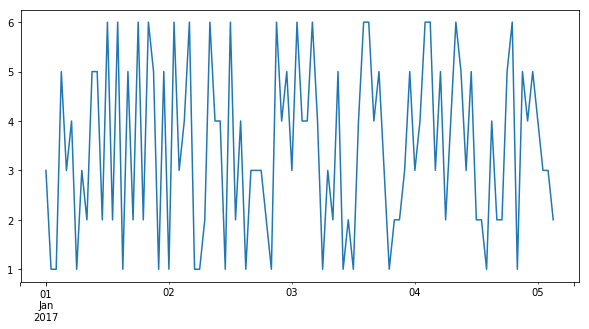

In [19]:
plt.figure(figsize = ( 10,5))
zar.head(100).plot()
plt.show()

Erişim için tarih vererek (indeks değerlerine uygun olacak şekilde), istediğimiz zaman aralığındaki değerleri görebiliriz.

In [20]:
#1 Ocak tarihine ait gözlemler
print(zar['2017-01-01'])

#1 Ocak 13:00:00 ile 16:30:00 arasındaki gözlemler
print(zar['2017-01-01 13:00:00' : '2017-01-01 16:30:00'])

2017-01-01 00:00:00    3
2017-01-01 01:00:00    1
2017-01-01 02:00:00    1
2017-01-01 03:00:00    5
2017-01-01 04:00:00    3
2017-01-01 05:00:00    4
2017-01-01 06:00:00    1
2017-01-01 07:00:00    3
2017-01-01 08:00:00    2
2017-01-01 09:00:00    5
2017-01-01 10:00:00    5
2017-01-01 11:00:00    2
2017-01-01 12:00:00    6
2017-01-01 13:00:00    2
2017-01-01 14:00:00    6
2017-01-01 15:00:00    1
2017-01-01 16:00:00    5
2017-01-01 17:00:00    2
2017-01-01 18:00:00    6
2017-01-01 19:00:00    2
2017-01-01 20:00:00    6
2017-01-01 21:00:00    5
2017-01-01 22:00:00    1
2017-01-01 23:00:00    5
Freq: H, dtype: int32
2017-01-01 13:00:00    2
2017-01-01 14:00:00    6
2017-01-01 15:00:00    1
2017-01-01 16:00:00    5
Freq: H, dtype: int32


Zaman serilerinin bir avantajı veriyi istediğimiz sıklıkta yeniden şekillendirebilmemiz. Örnek olarak 6 saatlik toplamlara ya da günlük ortalamaya bakabiliriz. İşlemler sonucunda elde edeceğimiz seriler için önceden bahsettiğimiz `Pandas` fonksiyonlarını kullanabiliriz.

2017-01-01 00:00:00    17
2017-01-01 06:00:00    18
2017-01-01 12:00:00    22
2017-01-01 18:00:00    25
2017-01-02 00:00:00    21
Freq: 6H, dtype: int32
2017-01-01    3.416667
2017-01-02    3.291667
2017-01-03    3.458333
2017-01-04    3.791667
2017-01-05    3.291667
Freq: D, dtype: float64


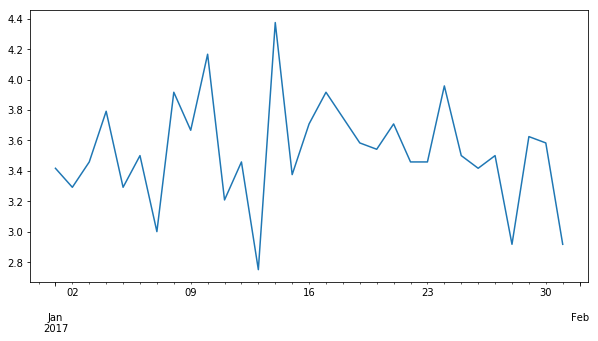

En şanslı olduğumuz gün: 2017-01-14 00:00:00, zarların ortalaması: 4.375


In [21]:
# 6 saatlik toplamlara bakalım.
zar1 = zar.resample('6H').sum()
print(zar1.head())

# Günlük ortalamaya bakalım.
zar2 = zar.resample('D').mean()
print(zar2.head())

# Günlük ortalamaları çizgi grafiği biçiminde çizdirelim.
plt.figure(figsize=(10,5))
zar2.plot(kind = 'line')
plt.show()
print('En şanslı olduğumuz gün: {}, zarların ortalaması: {}'.format(zar2.idxmax(), zar2[zar2.idxmax()]))

Bu yazının Jupyter defterine [Github](https://github.com/sibirbil/VeriDefteri) dizinimizden ulaşabilirsiniz.